<a href="https://colab.research.google.com/github/hsching/Airline-Passenger-Satisfaction-Predictive-Models/blob/main/1_Data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing

# import file from the folder "ISOM3360" in our MyDrive, with shortcut of shared folder "ISOM3360 group project" in
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_name = 'train.csv'
loc = ''
# loc = '/content/drive/MyDrive/ISOM3360/ISOM3360 group project/Airline Passenger Dataset/'
train = pd.read_csv(loc+file_name, index_col=0)
train

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [ ]:
print(train.info())
train.describe()
# "Arrival Delay in Minutes" has missing value

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25976 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 25976 non-null  int64  
 1   Gender                             25976 non-null  object 
 2   Customer Type                      25976 non-null  object 
 3   Age                                25976 non-null  int64  
 4   Type of Travel                     25976 non-null  object 
 5   Class                              25976 non-null  object 
 6   Flight Distance                    25976 non-null  int64  
 7   Inflight wifi service              25976 non-null  int64  
 8   Departure/Arrival time convenient  25976 non-null  int64  
 9   Ease of Online booking             25976 non-null  int64  
 10  Gate location                      25976 non-null  int64  
 11  Food and drink                     25976 non-null  int

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


# Data Cleaning - Dealing with missing value and useless variable

In [ ]:
# As sd is huge (at leat 50% of data = 0, pr75 = 13, max = 1584), use median to fill in missing value
train_df = train.copy()
train_df['Arrival Delay in Minutes'].fillna(train['Arrival Delay in Minutes'].median(), inplace = True)
train_df.set_index('id', drop=True)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied


# Data Visualization

In [ ]:
#resulting the matplotlib graphs be stored in the notebook, next to the code
%matplotlib inline

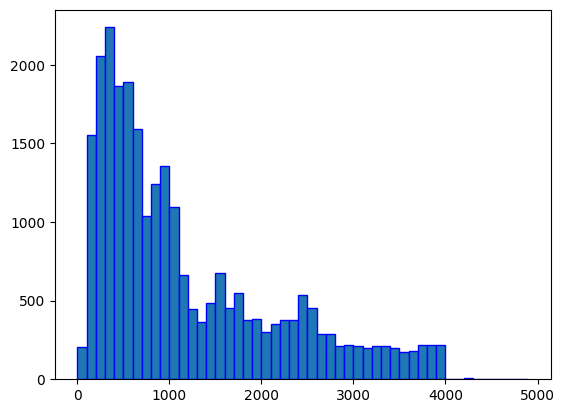

In [ ]:
plt.hist(train_df['Flight Distance'],bins=range(0,5000,100), edgecolor='b')
plt.show()

# Data Preparation - Discretization for continuous variables


<Axes: >

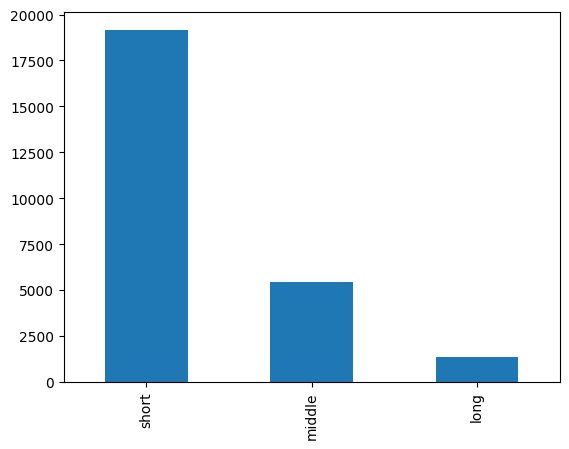

In [ ]:
train_df['Flight Distance_binned'] = pd.cut(train_df['Flight Distance'], 3, labels=['short', 'middle', 'long'])
train_df = train_df.drop(columns=['Flight Distance'])
train_df['Flight Distance_binned'].value_counts().plot(kind='bar')

# Data Preparation - Handling categorical variable

In [ ]:
# method 1: get_dummies
train_df_dummies = pd.get_dummies(train_df, columns = ['Gender', 'satisfaction'], drop_first=True)
train_df_dummies = pd.get_dummies(train_df_dummies, columns=['Customer Type', 'Type of Travel', 'Class', 'Flight Distance_binned'])
train_df_dummies

,id,Age,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Flight Distance_binned_short,Flight Distance_binned_middle,Flight Distance_binned_long
0,19556,52,5,4,3,4,3,4,3,5,...,1,0,1,0,0,1,0,1,0,0
1,90035,36,1,1,3,1,5,4,5,4,...,1,0,1,0,1,0,0,0,1,0
2,12360,20,2,0,2,4,2,2,2,2,...,0,1,1,0,0,1,0,1,0,0
3,77959,44,0,0,0,2,3,4,4,1,...,1,0,1,0,1,0,0,0,0,1
4,36875,49,2,3,4,3,4,1,2,2,...,1,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,34,3,3,3,1,4,3,4,4,...,0,1,1,0,1,0,0,1,0,0
25972,71167,23,4,4,4,4,4,4,4,4,...,1,0,1,0,1,0,0,1,0,0
25973,37675,17,2,5,1,5,2,1,2,2,...,1,0,0,1,0,1,0,1,0,0
25974,90086,14,3,3,3,3,4,4,4,4,...,1,0,1,0,1,0,0,1,0,0


In [ ]:
# method 2: OneHotEncoder()
enc = preprocessing.OneHotEncoder(drop='if_binary', sparse=False, handle_unknown='ignore')

# only categorical columns is fitted and transformed
temp_data = enc.fit_transform(train_df[['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Flight Distance_binned', 'satisfaction']]) #array
temp_df = pd.DataFrame(data=temp_data, columns=enc.get_feature_names_out()) 

# drop original categorical columns and concatenate the post-processed categorical columns with original dataframe
train_df.drop(columns= ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Flight Distance_binned', 'satisfaction'], axis=1, inplace=True)
train_df_ohe = pd.concat([train_df.reset_index(drop=True), temp_df], axis=1)
train_df_ohe = train_df_ohe.set_index('id')
train_df_ohe

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Age,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,...,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Flight Distance_binned_long,Flight Distance_binned_middle,Flight Distance_binned_short,satisfaction_satisfied
id,,,,,,,,,,,,,,,,,,,,,
19556,52,5,4,3,4,3,4,3,5,5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
90035,36,1,1,3,1,5,4,5,4,4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
12360,20,2,0,2,4,2,2,2,2,4,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
77959,44,0,0,0,2,3,4,4,1,1,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
36875,49,2,3,4,3,4,1,2,2,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78463,34,3,3,3,1,4,3,4,4,3,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
71167,23,4,4,4,4,4,4,4,4,4,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
37675,17,2,5,1,5,2,1,2,2,4,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# As OneHotEncoder can save the exploded categories into its objects, it's more convenient for further usage
train_df = train_df_ohe

# Data Preparation - Normalization for continuous variables (standard + MinMax)

In [ ]:
train_df.iloc[:,0:17].describe()

,Age,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.133392
std,15.114964,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.649776
min,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [ ]:
# columns[1:16] are continuous variables
# Except for than ['Age', 'Departure Delay', 'Arrival Delay'], others are all scaled from 0 to 5, so choose MinMaxScaler (scaling to range 0-1)
# ['Age', 'Departure Delay', 'Arrival Delay'] has a larger SD, so choose z-score to observe more details

train_df['Age'] = preprocessing.StandardScaler().fit_transform(train_df[['Age']])
train_df.iloc[:,1:15] = preprocessing.MinMaxScaler().fit_transform(train_df.iloc[:,1:15])
train_df.iloc[:,15:17] = preprocessing.StandardScaler().fit_transform(train_df.iloc[:,15:17])

train_df.iloc[:,0:17]

,Age,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
id,,,,,,,,,,,,,,,,,
70172,-1.745279,0.6,0.8,0.6,0.2,1.0,0.6,1.0,1.0,0.8,0.6,0.75,0.8,1.0,1.0,0.266393,0.074169
5047,-0.951360,0.6,0.4,0.6,0.6,0.2,0.6,0.2,0.2,0.2,1.0,0.50,0.2,0.8,0.2,-0.361375,-0.236313
110028,-0.885200,0.4,0.4,0.4,0.4,1.0,1.0,1.0,1.0,0.8,0.6,0.75,0.8,0.8,1.0,-0.387532,-0.391554
24026,-0.951360,0.4,1.0,1.0,1.0,0.4,0.4,0.4,0.4,0.4,1.0,0.50,0.2,0.8,0.4,-0.099805,-0.158692
119299,1.430397,0.6,0.6,0.6,0.6,0.8,1.0,1.0,0.6,0.6,0.8,0.75,0.6,0.6,0.6,-0.387532,-0.391554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94171,-1.083680,0.4,0.2,0.4,0.6,0.4,0.4,0.4,0.4,0.6,0.2,0.75,0.4,0.6,0.4,-0.309061,-0.391554
73097,0.636478,0.8,0.8,0.8,0.8,0.4,0.8,1.0,1.0,1.0,1.0,1.00,1.0,1.0,0.8,-0.387532,-0.391554
68825,-0.620561,0.2,0.2,0.2,0.6,0.8,0.2,1.0,0.8,0.6,0.4,0.75,1.0,1.0,0.8,-0.204433,-0.029325


In [ ]:
file_name = 'train_processed (mixed).csv'
loc = ''
# loc = '/content/drive/MyDrive/ISOM3360/ISOM3360 group project/Cathy_Data preparation, Decision tree/'
train_df.to_csv(loc + file_name)

# Data Preparation - Normalization for continuous variables (all MinMax)

In [ ]:
train_df.iloc[:,0:17].describe()

,Age,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05
mean,6.906839e-18,5.976809e-17,-1.634391e-16,1.459326e-16,3.446581e-17,1.488048e-16,-2.708028e-17,-7.713776e-17,-2.297721e-17,1.813558e-16,1.685679e-16,-1.723290e-17,4.405674e-17,5.224579e-17,-1.860060e-17,-3.726957e-17,1.285629e-17
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-2.142239e+00,-2.055758e+00,-2.006662e+00,-1.970731e+00,-2.330031e+00,-2.408473e+00,-2.408573e+00,-2.607418e+00,-2.519278e+00,-2.625348e+00,-2.547172e+00,-2.228672e+00,-2.611283e+00,-3.096504e+00,-2.504332e+00,-3.875318e-01,-3.915538e-01
25%,-8.190404e-01,-5.495334e-01,-6.952452e-01,-5.410596e-01,-7.646142e-01,-9.041783e-01,-9.265454e-01,-1.091211e+00,-1.018885e+00,-1.072973e+00,-1.026951e+00,-5.350448e-01,-2.404718e-01,-5.447401e-01,-9.802512e-01,-3.875318e-01,-3.915538e-01
50%,4.103858e-02,2.035790e-01,-3.953663e-02,1.737761e-01,1.809426e-02,-1.520308e-01,-1.855316e-01,4.249958e-01,4.815079e-01,4.794026e-01,4.932700e-01,3.117685e-01,-2.404718e-01,3.058479e-01,-2.182109e-01,-3.875318e-01,-3.915538e-01
75%,7.687977e-01,9.566913e-01,6.161719e-01,8.886119e-01,8.008027e-01,6.001168e-01,5.554822e-01,1.183099e+00,4.815079e-01,4.794026e-01,4.932700e-01,1.158582e+00,5.497986e-01,1.156436e+00,5.438294e-01,-7.364806e-02,-5.519832e-02
max,3.018235e+00,1.709804e+00,1.271880e+00,1.603448e+00,1.583511e+00,1.352264e+00,1.296496e+00,1.183099e+00,1.231704e+00,1.255590e+00,1.253380e+00,1.158582e+00,1.340069e+00,1.156436e+00,1.305870e+00,4.125438e+01,4.059206e+01


In [ ]:
# columns[0:16] are continuous variables
train_df.iloc[:,:17] = preprocessing.MinMaxScaler().fit_transform(train_df.iloc[:,:17])

train_df.iloc[:,0:17]

,Age,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
id,,,,,,,,,,,,,,,,,
70172,0.076923,0.6,0.8,0.6,0.2,1.0,0.6,1.0,1.0,0.8,0.6,0.75,0.8,1.0,1.0,0.015704,0.011364
5047,0.230769,0.6,0.4,0.6,0.6,0.2,0.6,0.2,0.2,0.2,1.0,0.50,0.2,0.8,0.2,0.000628,0.003788
110028,0.243590,0.4,0.4,0.4,0.4,1.0,1.0,1.0,1.0,0.8,0.6,0.75,0.8,0.8,1.0,0.000000,0.000000
24026,0.230769,0.4,1.0,1.0,1.0,0.4,0.4,0.4,0.4,0.4,1.0,0.50,0.2,0.8,0.4,0.006910,0.005682
119299,0.692308,0.6,0.6,0.6,0.6,0.8,1.0,1.0,0.6,0.6,0.8,0.75,0.6,0.6,0.6,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94171,0.205128,0.4,0.2,0.4,0.6,0.4,0.4,0.4,0.4,0.6,0.2,0.75,0.4,0.6,0.4,0.001884,0.000000
73097,0.538462,0.8,0.8,0.8,0.8,0.4,0.8,1.0,1.0,1.0,1.0,1.00,1.0,1.0,0.8,0.000000,0.000000
68825,0.294872,0.2,0.2,0.2,0.6,0.8,0.2,1.0,0.8,0.6,0.4,0.75,1.0,1.0,0.8,0.004397,0.008838


In [ ]:
file_name = 'train_processed (all MinMax).csv'
loc = ''
# loc = '/content/drive/MyDrive/ISOM3360/ISOM3360 group project/Cathy_Data preparation, Decision tree/'
train_df.to_csv(loc + file_name)

# Data Preparation - Normalization for continuous variables (all Standardization)

In [ ]:
# make sure the data is correct (not be affected by previous execution)
train_df.iloc[:,0:17].describe()

,Age,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25976.000000
mean,39.620958,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.693756
std,15.135685,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.466787
min,7.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,27.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,40.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,51.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,85.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


In [ ]:
# columns[0:16] are continuous variables
train_df.iloc[:,:17] = preprocessing.StandardScaler().fit_transform(train_df.iloc[:,:17])

train_df.iloc[:,0:17]

,Age,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
id,,,,,,,,,,,,,,,,,
19556,0.817887,1.703853,0.621641,0.172143,0.797831,-0.161739,0.544692,-0.340303,1.227138,1.259170,1.250974,1.161716,-1.035348,1.144063,1.298998,0.953810,0.782208
90035,-0.239238,-1.291598,-1.334871,0.172143,-1.542065,1.340348,0.544692,1.174774,0.479907,0.479178,0.492730,0.311739,-0.247517,0.297077,1.298998,-0.382286,-0.392188
12360,-1.296363,-0.542735,-1.987042,-0.535609,0.797831,-0.912783,-0.930768,-1.097842,-1.014556,0.479178,-1.782001,-0.538238,-1.035348,-1.396893,-0.974927,-0.382286,-0.392188
77959,0.289325,-2.040460,-1.987042,-1.951114,-0.762100,-0.161739,0.544692,0.417235,-1.761787,-1.860800,-1.782001,-2.238193,-0.247517,-2.243878,0.541023,-0.382286,-0.232043
36875,0.619676,-0.542735,-0.030530,0.879895,0.017866,0.589304,-1.668498,-1.097842,-1.014556,-1.080807,-1.023758,-1.388216,0.540315,-1.396893,0.541023,-0.382286,0.141628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78463,-0.371378,0.206128,-0.030530,0.172143,-1.542065,0.589304,-0.193038,0.417235,0.479907,-0.300815,-1.023758,0.311739,0.540315,1.144063,0.541023,-0.382286,-0.392188
71167,-1.098152,0.954990,0.621641,0.879895,0.797831,0.589304,0.544692,0.417235,0.479907,0.479178,1.250974,1.161716,1.328146,1.144063,0.541023,-0.382286,-0.392188
37675,-1.494573,-0.542735,1.273812,-1.243362,1.577797,-0.912783,-1.668498,-1.097842,-1.014556,0.479178,-0.265514,0.311739,1.328146,0.297077,-0.974927,-0.382286,-0.392188


In [ ]:
file_name = 'train_processed (all standardization).csv'
loc = ''
# loc = '/content/drive/MyDrive/ISOM3360/ISOM3360 group project/Cathy_Data preparation, Decision tree/'
train_df.to_csv(loc + file_name)